Proyecto Final - Inteligencia Artificial


*   Jose Acuña
*   Alejandro Curay



In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import DBSCAN
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

**Parte 1: Pre-procesamiento de los datos - 5 puntos**
1.   Realice actividades de limpieza de los datos tales como manejo de valores vacíos, tipos de datos y/o datos inconsistentes.
2.   Decida qué datos y qué variables van a ser consideradas para resolver su problema. Jusitfique la selección.
3.   Transforme las variables  categóricas a numéricas en el caso de ser necesario.
4.   Normalice todas las variables numéricas.





In [24]:
# Cargar los datos
df = pd.read_csv('Customer_Data.csv')
# Calcular el porcentaje de valores nulos
print(df.isnull().mean() * 100)

Customer_ID                 0.000000
Customer_Status             0.000000
Old_Class                   0.000000
Geographical_ID             0.000000
CustCreationDate            0.000000
Net_ Purchase(IRR)          0.000000
Avg_Invoice_Row_No          0.000000
Waste_Rate                  0.000000
Rejected_Rate               0.000000
Avg_Purchase_In_Month       0.000000
Date_Of_Last_ Purchase      0.246594
Unnamed: 11               100.000000
Unnamed: 12               100.000000
dtype: float64


Se borrarán las columnas Unnamed: 11 y Unnamed: 12 porque solo contiene datos nulos y se borrará la columna Customer_ID porque no es relevante para el analisis

In [25]:
#Realice actividades de limpieza de los datos tales como manejo de valores vacíos, tipos de datos y/o datos inconsistentes.
df2 = df.copy()

df2.drop(['Unnamed: 11', 'Unnamed: 12', 'Customer_ID', 'CustCreationDate', 'Date_Of_Last_ Purchase'], axis=1, inplace=True)
df2

,Customer_Status,Old_Class,Geographical_ID,Net_ Purchase(IRR),Avg_Invoice_Row_No,Waste_Rate,Rejected_Rate,Avg_Purchase_In_Month
0,Active,C,1,0.0,0.0,0.0,0.0,0
1,Active,C,1,0.0,0.0,0.0,0.0,0
2,Active,C,1,0.0,0.0,0.0,0.0,0
3,Active,C,1,0.0,0.0,0.0,0.0,0
4,Inactive,C,2,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...
88805,Active,C,5,0.0,0.0,0.0,0.0,0
88806,Active,C,18,0.0,0.0,0.0,0.0,0
88807,Active,C,18,0.0,0.0,0.0,0.0,0
88808,Active,C,18,0.0,0.0,0.0,0.0,0


Decida qué datos y qué variables van a ser consideradas para resolver su problema. Jusitfique la selección.

Las variables que quedan son las que se considerarán para solucionar el problema debido a que influyen directamente en el resultado

Despues de borrar las columnas innecesarias se procederá a hacer una adaptación de los datos de cada columna

In [26]:
#Los datos de usuarios inactivos no los necesitamos, por lo tanto se borrarán y luego de ser borrados la variable
#Customer_Status para a ser inservible para el ejercicio
df3 = df2.copy()
df3 = df3[df3['Customer_Status'] != 'Inactive'].reset_index(drop=True)
df3.drop(['Customer_Status'], axis=1, inplace=True)
df3

,Old_Class,Geographical_ID,Net_ Purchase(IRR),Avg_Invoice_Row_No,Waste_Rate,Rejected_Rate,Avg_Purchase_In_Month
0,C,1,0.0,0.0,0.0,0.0,0
1,C,1,0.0,0.0,0.0,0.0,0
2,C,1,0.0,0.0,0.0,0.0,0
3,C,1,0.0,0.0,0.0,0.0,0
4,A,2,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...
68524,C,5,0.0,0.0,0.0,0.0,0
68525,C,18,0.0,0.0,0.0,0.0,0
68526,C,18,0.0,0.0,0.0,0.0,0
68527,C,18,0.0,0.0,0.0,0.0,0


In [27]:
#Transforme las variables categóricas a numéricas en el caso de ser necesario.
dummies_old_class = pd.get_dummies(df3['Old_Class'], prefix='Old_Class').astype(int)
df3 = pd.concat([df3, dummies_old_class], axis=1)
df3.drop('Old_Class', axis=1, inplace=True)
df3

,Geographical_ID,Net_ Purchase(IRR),Avg_Invoice_Row_No,Waste_Rate,Rejected_Rate,Avg_Purchase_In_Month,Old_Class_A,Old_Class_A+,Old_Class_B,Old_Class_C
0,1,0.0,0.0,0.0,0.0,0,0,0,0,1
1,1,0.0,0.0,0.0,0.0,0,0,0,0,1
2,1,0.0,0.0,0.0,0.0,0,0,0,0,1
3,1,0.0,0.0,0.0,0.0,0,0,0,0,1
4,2,0.0,0.0,0.0,0.0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
68524,5,0.0,0.0,0.0,0.0,0,0,0,0,1
68525,18,0.0,0.0,0.0,0.0,0,0,0,0,1
68526,18,0.0,0.0,0.0,0.0,0,0,0,0,1
68527,18,0.0,0.0,0.0,0.0,0,0,0,0,1


Para las columnas Net_ Purchase(IRR)	Avg_Invoice_Row_No	Waste_Rate	Rejected_Rate	Avg_Purchase_In_Month es necesario realizar un cambio de los valores 0 con la media de cada columna

In [28]:
columnas_a_reemplazar = ['Net_ Purchase(IRR)', 'Avg_Invoice_Row_No', 'Waste_Rate', 'Rejected_Rate', 'Avg_Purchase_In_Month']

for columna in columnas_a_reemplazar:
    media_valor = df3[columna][df3[columna] != 0].mean()  # Calcular la media sin contar ceros
    df3[columna] = df3[columna].replace(0, media_valor)  # Reemplazar ceros con la media
df3

,Geographical_ID,Net_ Purchase(IRR),Avg_Invoice_Row_No,Waste_Rate,Rejected_Rate,Avg_Purchase_In_Month,Old_Class_A,Old_Class_A+,Old_Class_B,Old_Class_C
0,1,6.003394e+08,12.21786,0.225189,1.458643,37.366193,0,0,0,1
1,1,6.003394e+08,12.21786,0.225189,1.458643,37.366193,0,0,0,1
2,1,6.003394e+08,12.21786,0.225189,1.458643,37.366193,0,0,0,1
3,1,6.003394e+08,12.21786,0.225189,1.458643,37.366193,0,0,0,1
4,2,6.003394e+08,12.21786,0.225189,1.458643,37.366193,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
68524,5,6.003394e+08,12.21786,0.225189,1.458643,37.366193,0,0,0,1
68525,18,6.003394e+08,12.21786,0.225189,1.458643,37.366193,0,0,0,1
68526,18,6.003394e+08,12.21786,0.225189,1.458643,37.366193,0,0,0,1
68527,18,6.003394e+08,12.21786,0.225189,1.458643,37.366193,0,0,0,1


Ahora que ya no existen valores nulos o con ceros es necesario realizar la estandarización de datos numericos que se realizara con un standar scaler

In [29]:
# Normalice todas las variables numéricas.
df4 = df3.copy()
numerical_cols = df4.select_dtypes(include=['float64', 'int64']).columns  # Seleccionar todas las columnas numéricas

scaler = StandardScaler()
df4[numerical_cols] = scaler.fit_transform(df4[numerical_cols])  # Escalar todas las columnas numéricas
df4


,Geographical_ID,Net_ Purchase(IRR),Avg_Invoice_Row_No,Waste_Rate,Rejected_Rate,Avg_Purchase_In_Month,Old_Class_A,Old_Class_A+,Old_Class_B,Old_Class_C
0,-1.555900,9.330699e-17,2.072558e-16,0.0,-3.166686e-18,0.0,-0.357684,-0.220631,-0.683643,0.957602
1,-1.555900,9.330699e-17,2.072558e-16,0.0,-3.166686e-18,0.0,-0.357684,-0.220631,-0.683643,0.957602
2,-1.555900,9.330699e-17,2.072558e-16,0.0,-3.166686e-18,0.0,-0.357684,-0.220631,-0.683643,0.957602
3,-1.555900,9.330699e-17,2.072558e-16,0.0,-3.166686e-18,0.0,-0.357684,-0.220631,-0.683643,0.957602
4,-1.432239,9.330699e-17,2.072558e-16,0.0,-3.166686e-18,0.0,2.795762,-0.220631,-0.683643,-1.044275
...,...,...,...,...,...,...,...,...,...,...
68524,-1.061255,9.330699e-17,2.072558e-16,0.0,-3.166686e-18,0.0,-0.357684,-0.220631,-0.683643,0.957602
68525,0.546340,9.330699e-17,2.072558e-16,0.0,-3.166686e-18,0.0,-0.357684,-0.220631,-0.683643,0.957602
68526,0.546340,9.330699e-17,2.072558e-16,0.0,-3.166686e-18,0.0,-0.357684,-0.220631,-0.683643,0.957602
68527,0.546340,9.330699e-17,2.072558e-16,0.0,-3.166686e-18,0.0,-0.357684,-0.220631,-0.683643,0.957602


Con esto terminamos el preprocesamiento de datos, empezamos con el Análisis Exploratorio de los datos, para esto nos concentraremos especificamente en las columnas numericas

**Parte 2: Análisis Exploratorio de los datos - 5 puntos**


1.   Realice gráficos boxplots para cada una de las variables para determinar si existen outliers (valores atípicos).
2.   Elimine los outliers en cada una de las variables con la técnica del rango intercuartílico (usted deberá consultar cómo realizarlo).
3.   Vuelva a realizar gráficos boxplots para determinar como quedaron las variables.




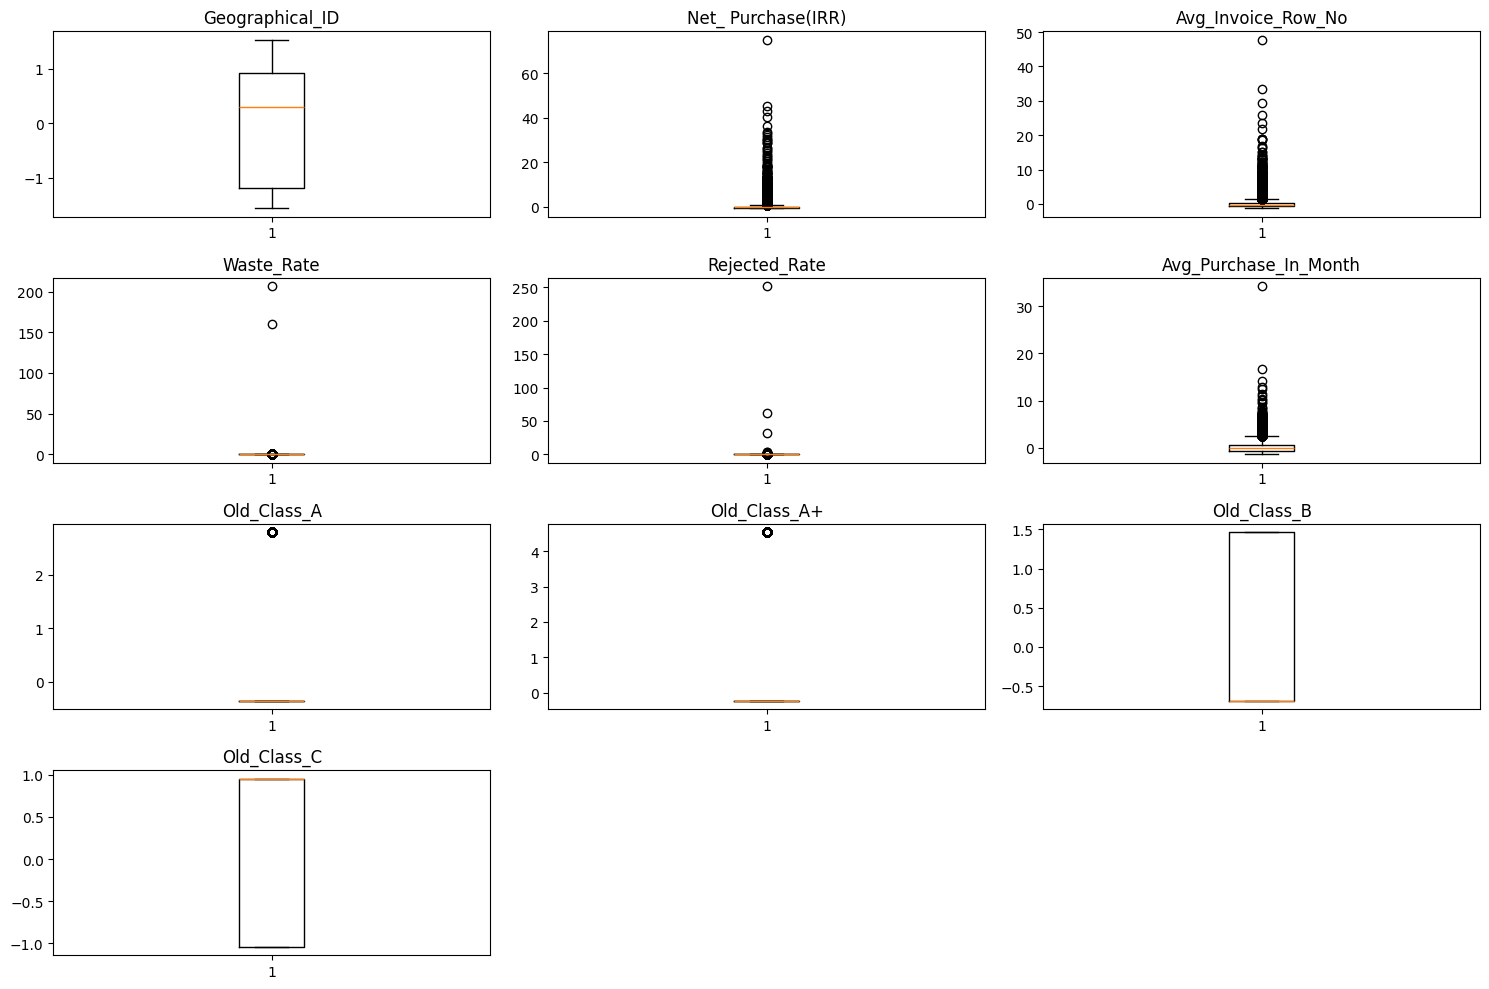

In [30]:
#Realice gráficos boxplots para cada una de las variables para determinar si existen outliers (valores atípicos).
df5 = df4.copy()
plt.figure(figsize=(15, 10))
for i, columna in enumerate(numerical_cols):
    plt.subplot(4, 3, i + 1)
    plt.boxplot(df5[columna])
    plt.title(columna)
plt.tight_layout()
plt.show()


In [31]:
#Elimine los outliers en cada una de las variables con la técnica del rango intercuartílico (usted deberá consultar cómo realizarlo).
# Eliminar outliers utilizando IQR
for columna in numerical_cols:
    Q1 = df5[columna].quantile(0.25)  # Primer cuartil
    Q3 = df5[columna].quantile(0.75)  # Tercer cuartil
    IQR = Q3 - Q1  # Rango intercuartílico

    # Definir límites para los outliers
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    # Mantener solo valores dentro de los límites
    df5 = df5[(df5[columna] >= limite_inferior) & (df5[columna] <= limite_superior)].reset_index(drop=True)

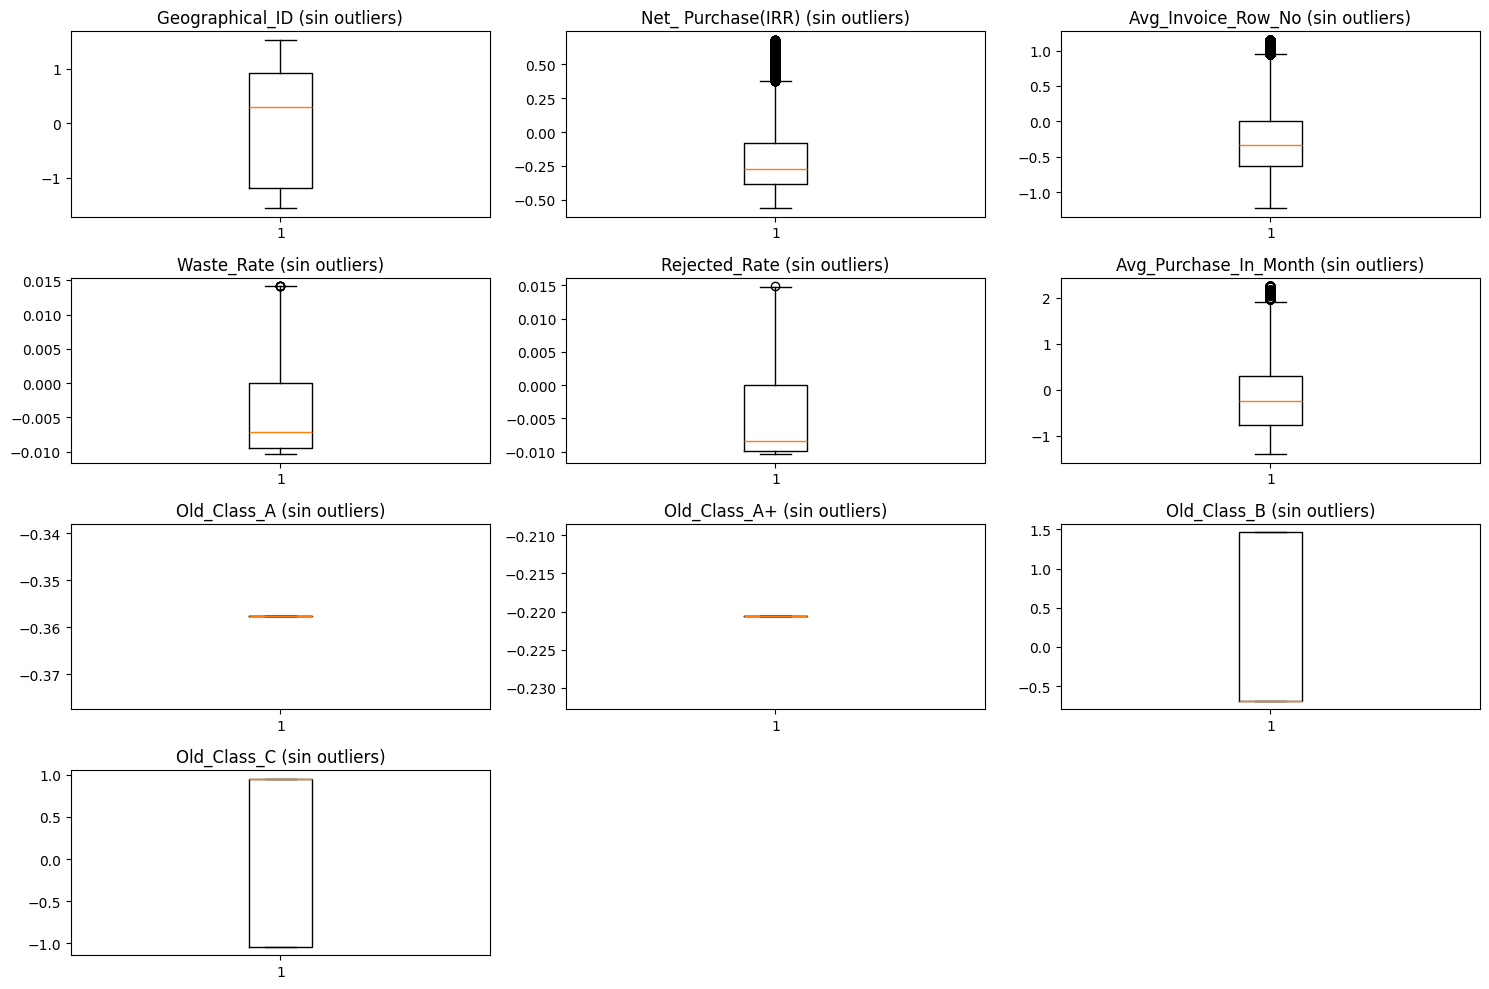

,Geographical_ID,Net_ Purchase(IRR),Avg_Invoice_Row_No,Waste_Rate,Rejected_Rate,Avg_Purchase_In_Month,Old_Class_A,Old_Class_A+,Old_Class_B,Old_Class_C
0,-1.555900,9.330699e-17,2.072558e-16,0.0,-3.166686e-18,0.0,-0.357684,-0.220631,-0.683643,0.957602
1,-1.555900,9.330699e-17,2.072558e-16,0.0,-3.166686e-18,0.0,-0.357684,-0.220631,-0.683643,0.957602
2,-1.555900,9.330699e-17,2.072558e-16,0.0,-3.166686e-18,0.0,-0.357684,-0.220631,-0.683643,0.957602
3,-1.555900,9.330699e-17,2.072558e-16,0.0,-3.166686e-18,0.0,-0.357684,-0.220631,-0.683643,0.957602
4,-1.555900,9.330699e-17,2.072558e-16,0.0,-3.166686e-18,0.0,-0.357684,-0.220631,-0.683643,0.957602
...,...,...,...,...,...,...,...,...,...,...
51910,-1.061255,9.330699e-17,2.072558e-16,0.0,-3.166686e-18,0.0,-0.357684,-0.220631,-0.683643,0.957602
51911,0.546340,9.330699e-17,2.072558e-16,0.0,-3.166686e-18,0.0,-0.357684,-0.220631,-0.683643,0.957602
51912,0.546340,9.330699e-17,2.072558e-16,0.0,-3.166686e-18,0.0,-0.357684,-0.220631,-0.683643,0.957602
51913,0.546340,9.330699e-17,2.072558e-16,0.0,-3.166686e-18,0.0,-0.357684,-0.220631,-0.683643,0.957602


In [32]:
#Vuelva a realizar gráficos boxplots para determinar como quedaron las variables.
plt.figure(figsize=(15, 10))
for i, columna in enumerate(numerical_cols):
    plt.subplot(4, 3, i + 1)
    plt.boxplot(df5[columna])
    plt.title(f'{columna} (sin outliers)')
plt.tight_layout()
plt.show()
df5

**Parte 3: Clustering - 5 puntos**

1.   Disminuya la dimensionalidad de su dataset a dos o tres dimensiones para verificar cómo se podría agrupar los datos.
2.   Aplique el algorimto K-Means para realizar la tarea de clustering.
3.   Evalúe la calidad del cluster visual y cuantitatívamente.
4.   Aplique el algoritmo DBSCAN para realizar la tarea de clustering.
5.   Evalúe la calidad del cluster visual y cuantitatívamente (consulte cómo evaluar cuantitativamente).
6.   Decida cual de las dos técnicas va a considerar para etiquetas los tipos de clientes (etiqueta resultado de clustering) y por qué.
7.   Interprete qué es cada uno de los clusters resultantes. Se recomienda que use valores medios de las variables numéricas o modas en el caso de ser variables categóricas.

Ahora empezaremos con el Clustering

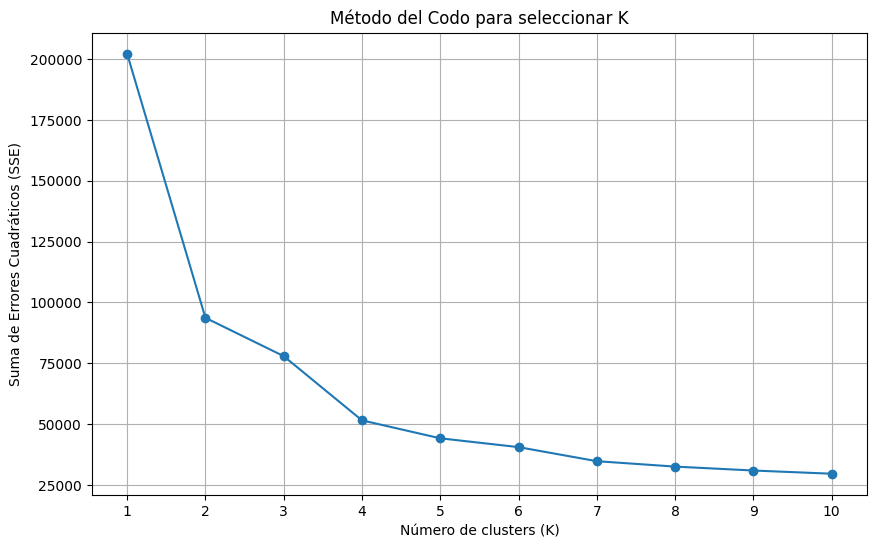

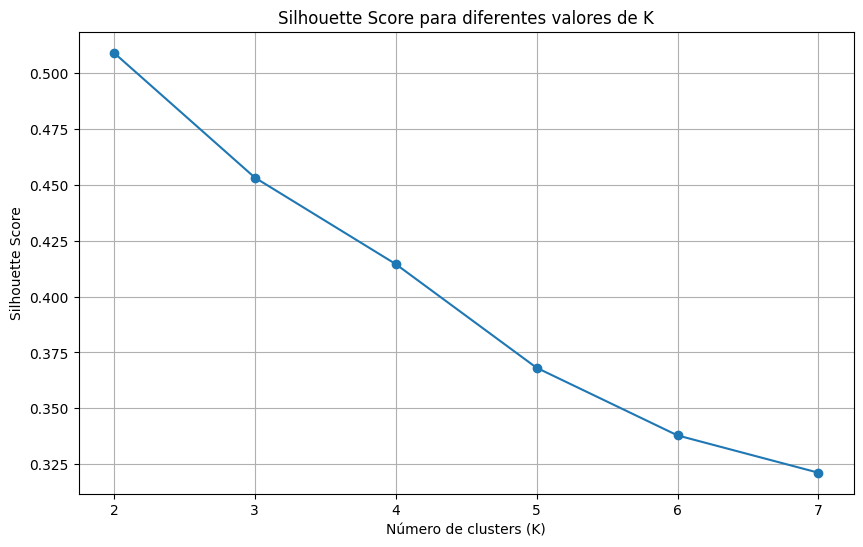

In [33]:
#Aplique el algorimto K-Means para realizar la tarea de clustering.

df6 = df5.copy()
df_numeric = df6.select_dtypes(include=['float64', 'int64'])  # Filtramos solo columnas numéricas

# Paso 1: Determinar el valor óptimo de K (Método del Codo)
sse = []
k_values = range(1, 11)  # Probar K de 1 a 10

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_numeric)
    sse.append(kmeans.inertia_)

# Graficar el método del codo
plt.figure(figsize=(10, 6))
plt.plot(k_values, sse, marker='o')
plt.title('Método del Codo para seleccionar K')
plt.xlabel('Número de clusters (K)')
plt.ylabel('Suma de Errores Cuadráticos (SSE)')
plt.xticks(k_values)
plt.grid()
plt.show()

# Paso 2: Evaluar Silhouette Score para diferentes valores de K
silhouette_scores = []
k_values = range(2, 8)  # Probar K de 2 a 7

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(df_numeric)
    silhouette_scores.append(silhouette_score(df_numeric, labels))

# Graficar el Silhouette Score
plt.figure(figsize=(10, 6))
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Score para diferentes valores de K')
plt.xlabel('Número de clusters (K)')
plt.ylabel('Silhouette Score')
plt.xticks(k_values)
plt.grid()
plt.show()

Por el metodo del codo y el metodo de silueta se llega a la conclusion de que el valor de K en K-means debe ser 2

In [34]:
#Disminuya la dimensionalidad de su dataset a dos o tres dimensiones para verificar cómo se podría agrupar los datos.
optimal_k = 2  # (Usar el valor de K determinado previamente con los gráficos)
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df6['KMeans_Cluster'] = kmeans.fit_predict(df_numeric)

# Paso 4: Reducir la dimensionalidad con PCA para visualizar los clusters
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df_numeric)

# Convertir los resultados de PCA a un DataFrame para visualización
df_pca = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])

# Agregar las etiquetas de los clústeres (KMeans_Cluster) al DataFrame de PCA
df_pca['Cluster'] = df6['KMeans_Cluster']

# Mostrar las primeras filas del DataFrame con las componentes principales y las etiquetas de los clústeres
print(df_pca.head())


      PCA1      PCA2  Cluster
0 -0.96441 -1.541359        0
1 -0.96441 -1.541359        0
2 -0.96441 -1.541359        0
3 -0.96441 -1.541359        0
4 -0.96441 -1.541359        0


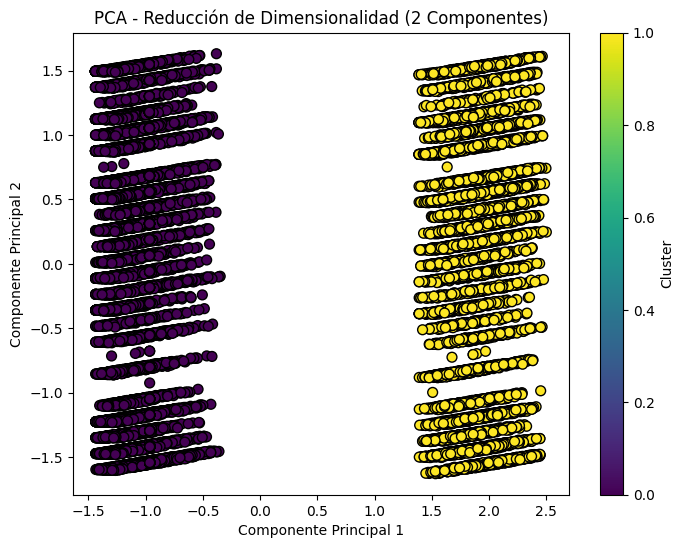

In [35]:
#Evalúe la calidad del cluster visual y cuantitatívamente.
plt.figure(figsize=(8, 6))
plt.scatter(df_pca['PCA1'], df_pca['PCA2'], c=df_pca['Cluster'], cmap='viridis', edgecolor='k', s=50)
plt.title('PCA - Reducción de Dimensionalidad (2 Componentes)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.colorbar(label='Cluster')
plt.show()


In [36]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(df_numeric, kmeans.labels_)
print(f'Silhouette Score: {silhouette_avg:.2f}')

Silhouette Score: 0.51


Este es un resultado es bastante mejor que la media y se acerca a ser un resultado optimo, continuamos con DBSCAN

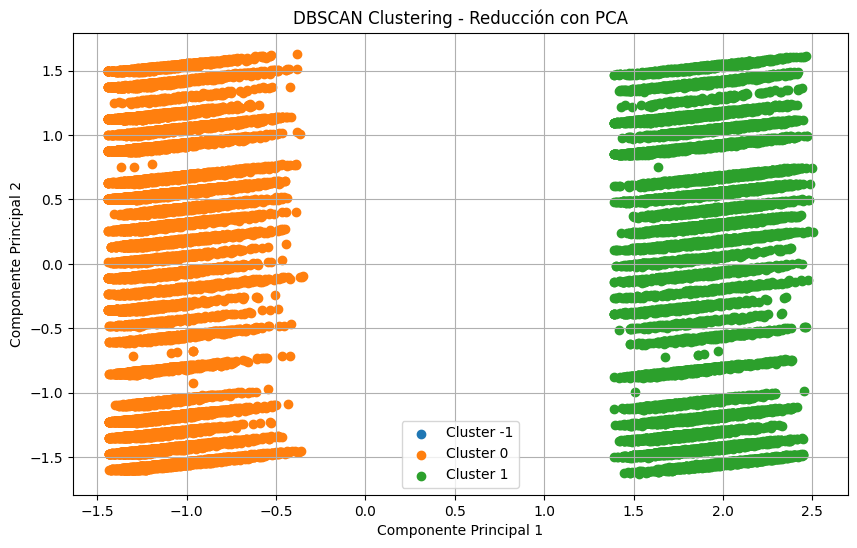

In [37]:
#Aplique el algoritmo DBSCAN para realizar la tarea de clustering.
df_dbscan = df6.copy()
# Ajustar modelo DBSCAN
eps = 0.5  # Distancia máxima para considerar puntos vecinos
min_samples = 5  # Número mínimo de puntos para formar un clúster
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
df_dbscan['DBSCAN_Cluster'] = dbscan.fit_predict(df_numeric)


#Evalúe la calidad del cluster visual y cuantitatívamente (consulte cómo evaluar cuantitativamente).

# Visualizar clústeres generados por DBSCAN
plt.figure(figsize=(10, 6))
for cluster in sorted(df_dbscan['DBSCAN_Cluster'].unique()):  # Asegurar un orden consistente
    subset = df_pca[df_pca['Cluster'] == cluster]
    plt.scatter(subset['PCA1'], subset['PCA2'], label=f'Cluster {cluster}')

plt.title('DBSCAN Clustering - Reducción con PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend()
plt.grid(True)
plt.show()


In [38]:
# Calcular Silhouette Score (excluyendo los puntos etiquetados como ruido -1)
labels = df_dbscan['DBSCAN_Cluster']
if len(set(labels)) > 1:  # Debe haber al menos 2 clústeres para calcular el score
    silhouette_avg2 = silhouette_score(df6[numerical_cols], labels, metric='euclidean')
    print(f'Silhouette Score: {silhouette_avg2}')
else:
    print("No se puede calcular el Silhouette Score: hay un único clúster o solo ruido.")


Silhouette Score: 0.36444191382357044


**Decida cual de las dos técnicas va a considerar para etiquetas los tipos de clientes (etiqueta resultado de clustering) y por qué.**
Se usará el cluster de K-means debido a que su Silhouette Score es mayor en relacion al de dbscan y que graficamente se ve correcto

                Geographical_ID  Net_ Purchase(IRR)  Avg_Invoice_Row_No  \
KMeans_Cluster                                                            
0                      0.006451           -0.273192           -0.334540   
1                     -0.002022           -0.088606           -0.151226   

                Waste_Rate  Rejected_Rate  Avg_Purchase_In_Month  Old_Class_A  \
KMeans_Cluster                                                                  
0                -0.004511      -0.005281              -0.364642    -0.357684   
1                -0.006498      -0.006548               0.184736    -0.357684   

                Old_Class_A+  Old_Class_B  Old_Class_C  
KMeans_Cluster                                          
0                  -0.220631    -0.683643     0.957602  
1                  -0.220631     1.462752    -1.044275  


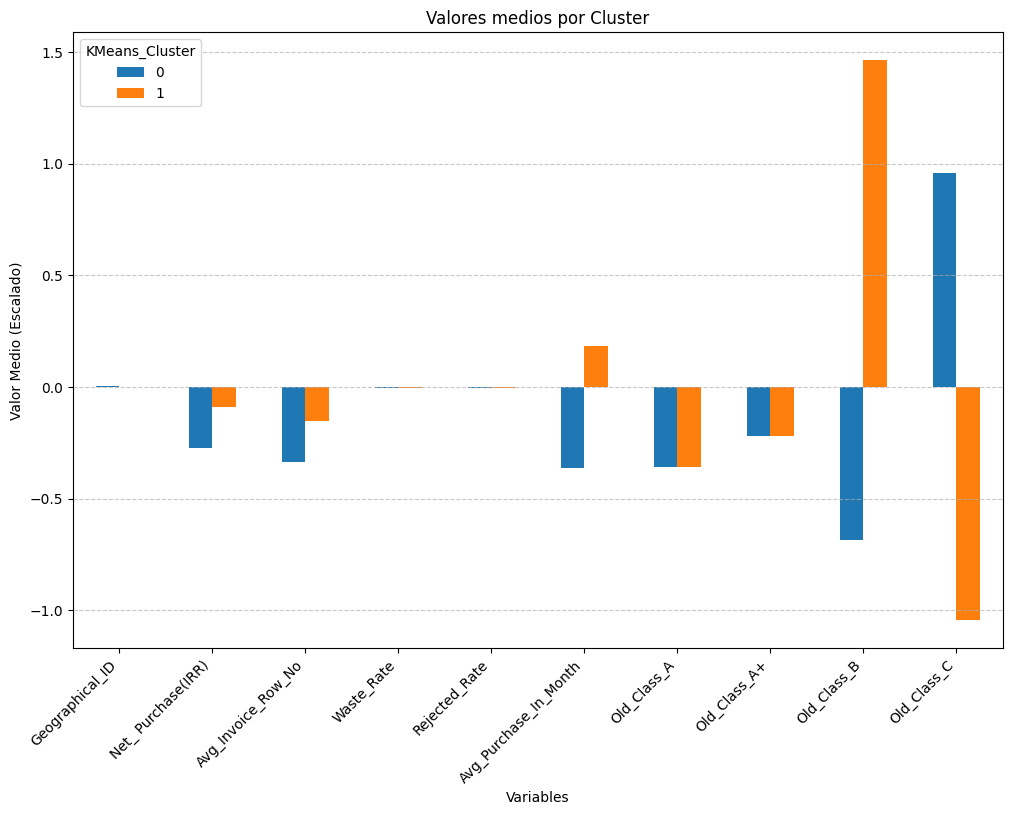

In [39]:
#Interprete qué es cada uno de los clusters resultantes.
#Se recomienda que use valores medios de las variables numéricas o modas en el caso de ser variables categóricas.

# Agrupar los datos por los clusters de K-Means
cluster_summary = df6.groupby('KMeans_Cluster').mean()

# Mostrar los valores medios de cada variable por cluster
print(cluster_summary)

# Visualización opcional
# Gráfico de barras agrupadas
cluster_summary.transpose().plot(kind='bar', figsize=(12, 8), title='Valores medios por Cluster')
plt.ylabel('Valor Medio (Escalado)')
plt.xlabel('Variables')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Cluster 0:


*   Geographical_ID: Cerca de 0, lo que indica que los clientes en este cluster están distribuidos geográficamente de manera uniforme.
*   Net_Purchase(IRR): Valor medio más bajo (-0.27), lo que podría indicar que estos clientes realizan menos compras o tienen un gasto menor en promedio.
*   Avg_Invoice_Row_No: Valor medio más bajo (-0.33), lo que indica que tienen facturas más pequeñas en comparación con el otro cluster.
*   Avg_Purchase_In_Month: Valor muy negativo (-0.36), sugiere que estos clientes compran con menos frecuencia.
*   Old_Class: Mayor proporción de clientes clasificados como "C" (0.96), lo que indica que pertenecen a la clase más baja en términos de clasificación.











Cluster 1:


*   Geographical_ID: Similar a Cluster 0, lo que indica una distribución uniforme.
*   Net_Purchase(IRR): Valor medio más alto (-0.08), indica un gasto promedio más elevado que Cluster 0.
*   Avg_Invoice_Row_No: Mejor que Cluster 0 (-0.15), lo que significa que sus facturas son de mayor tamaño.
*   Avg_Purchase_In_Month: Valor positivo (0.18), sugiere una frecuencia de compra más alta.
*   Old_Class: Mayor proporción de clientes clasificados como "B" (1.46), representando una clase más alta.

**Parte 4: Clasificación - 5 puntos**


1.   Con los datos etiquetados por clustering, genere tres modelos de clasificación (diferentes algortimos) que permitan predecir el tipo de cliente para futuros clientes.
2.   Cada modelo de presentar almenos tres métricas de evaluación.
3.   Decida cual de los tres modelos es el mejor y por qué.
4.   Pruebe el modelo seleccionada para un nuevo cliente. Usted deberá inventar los datos de entrada.




Antes de generar los modelo de clasificación es necesario etiquetar los datos del cluster

In [40]:
# Separar características (X) y etiquetas (y)
X = df6.drop(['KMeans_Cluster'], axis=1)
y = df6['KMeans_Cluster']

# Dividir los datos en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

**Con los datos etiquetados por clustering, genere tres modelos de clasificación (diferentes algortimos) que permitan predecir el tipo de cliente para futuros clientes.**

Los 3 modelos que se usarán son los de

*   Regresion logistica
*   Suport vector machine
*   KNN




In [41]:
# Definir y entrenar el modelo de Regresión Logística
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, y_train)
y_pred_logistic = logistic_model.predict(X_test)

# Calcular métricas para Regresión Logística
print("Resultados para Logistic Regression:\n")
print(classification_report(y_test, y_pred_logistic))


#Cada modelo de presentar almenos tres métricas de evaluación.
metrics_logistic = {
    "Accuracy": accuracy_score(y_test, y_pred_logistic),
    "Precision": precision_score(y_test, y_pred_logistic, average='weighted'),
    "Recall": recall_score(y_test, y_pred_logistic, average='weighted'),
    "F1 Score": f1_score(y_test, y_pred_logistic, average='weighted')
}

# Definir y entrenar el modelo SVM
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

# Calcular métricas para SVM
print("\nResultados para SVM:\n")
print(classification_report(y_test, y_pred_svm))


#Cada modelo de presentar almenos tres métricas de evaluación.
metrics_svm = {
    "Accuracy": accuracy_score(y_test, y_pred_svm),
    "Precision": precision_score(y_test, y_pred_svm, average='weighted'),
    "Recall": recall_score(y_test, y_pred_svm, average='weighted'),
    "F1 Score": f1_score(y_test, y_pred_svm, average='weighted')
}

# Definir y entrenar el modelo KNN
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

# Calcular métricas para KNN
print("\nResultados para KNN:\n")
print(classification_report(y_test, y_pred_knn))


#Cada modelo de presentar almenos tres métricas de evaluación.
metrics_knn = {
    "Accuracy": accuracy_score(y_test, y_pred_knn),
    "Precision": precision_score(y_test, y_pred_knn, average='weighted'),
    "Recall": recall_score(y_test, y_pred_knn, average='weighted'),
    "F1 Score": f1_score(y_test, y_pred_knn, average='weighted')
}

# Mostrar métricas de todos los modelos en un DataFrame
metrics_df = pd.DataFrame({
    "Logistic Regression": metrics_logistic,
    "SVM": metrics_svm,
    "KNN": metrics_knn
}).T

print("\nMétricas de todos los modelos:\n", metrics_df)

Resultados para Logistic Regression:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6560
           1       1.00      1.00      1.00      3823

    accuracy                           1.00     10383
   macro avg       1.00      1.00      1.00     10383
weighted avg       1.00      1.00      1.00     10383


Resultados para SVM:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6560
           1       1.00      1.00      1.00      3823

    accuracy                           1.00     10383
   macro avg       1.00      1.00      1.00     10383
weighted avg       1.00      1.00      1.00     10383


Resultados para KNN:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6560
           1       1.00      1.00      1.00      3823

    accuracy                           1.00     10383
   macro avg       1.00      1.00      1.00 

El modelo de K-means al lograr separar los clusters como se mostro en el gráfico y el valor del Silhouette Score es relativamente cercano a 1, por lo tanto es normal que los valores de recall, f1-score, accuracy y precision sean cercanos a 1 o directamenten 1

**Decida cual de los tres modelos es el mejor y por qué.**
Se usará el modelo de logistic regresion porque es el más simple de implementar y trabaja bien con una gran cantidad de datos.

In [42]:
#Pruebe el modelo seleccionada para un nuevo cliente. Usted deberá inventar los datos de entrada.

# Crear un nuevo cliente con datos ficticios
nuevo_cliente = {
    'Geographical_ID': 0.5,
    'Net_ Purchase(IRR)': -0.1,
    'Avg_Invoice_Row_No': 0.3,
    'Waste_Rate': -0.2,
    'Rejected_Rate': -0.1,
    'Avg_Purchase_In_Month': 0.4,
    'Old_Class_A': 0,
    'Old_Class_A+': 1,
    'Old_Class_B': 0,
    'Old_Class_C': 0
}

# Convertir el nuevo cliente en un DataFrame
nuevo_cliente_df = pd.DataFrame([nuevo_cliente])

# Predecir el cluster del nuevo cliente
prediccion = logistic_model.predict(nuevo_cliente_df)
print(f"El nuevo cliente pertenece al Cluster: {prediccion[0]}")


El nuevo cliente pertenece al Cluster: 0
